<a href="https://colab.research.google.com/github/Pengyu-gis/MyDeepLearing/blob/main/tree/main/MachineLearning/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# load MNIST dataset
digits = datasets.load_digits()

In [6]:
# extract image and label
X = digits.data
y = digits.target

In [7]:
# split dataset into train set and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Use PCA to low the dimension
n_components = 64
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [9]:
# creat SVM classifier
svm = SVC(kernel='rbf', class_weight='balanced', C=1.0, gamma=0.001)

# train SVM model
svm.fit(X_train_pca, y_train)

# predict test dataset
y_pred = svm.predict(X_test_pca)

# evaluate model capability
accuracy = accuracy_score(y_test, y_pred)

In [10]:
accuracy

0.9555555555555556

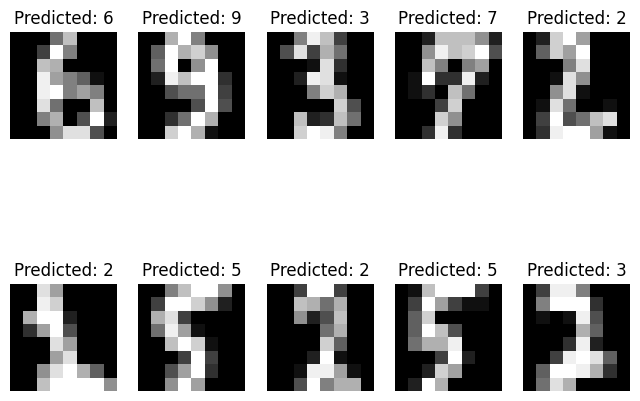

In [11]:
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}")
    plt.axis('off')
plt.show()